<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/youtube_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade google-api-python-client

     |████████████████████████████████| 61kB 4.5MB/s 
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12


In [0]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
import numpy as np
import pandas as pd
import pprint 
import matplotlib.pyplot as pd

DEVELOPER_KEY = "***********************************"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

def youtube_search(q, publishedAfter, publishedBefore, max_results=50,order="relevance", token=None,
                   location=None, location_radius=None, regionCode="US"):
    # 50 results is maximum
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

    search_response = youtube.search().list(
    q=q,
    type="video",
    pageToken=token,
    order =order,
    part="id,snippet", # Part signifies the different types of data you want 
    maxResults=max_results,
    location=location,
    regionCode=regionCode,
    publishedAfter=publishedAfter,
    publishedBefore=publishedBefore,
    locationRadius=location_radius).execute()

#     videos=channelId=channelTitle=categoryId=videoId=viewCount=likeCount=dislikeCount=commentCount=favoriteCount=category=tags  = []
    title = []
    channelId = []
    channelTitle = []
    categoryId = []
    videoId = []
    pubDate = [] 
    viewCount = []
    likeCount = []
    dislikeCount = []
    commentCount = []
    favoriteCount = []
    category = []
    tags = []
    videos = []
    
    for search_result in search_response.get("items", []):
        #pprint.pprint(search_result)
  
  
        if search_result["id"]["kind"] == "youtube#video":

            title.append(search_result['snippet']['title']) 

            videoId.append(search_result['id']['videoId'])

            response = youtube.videos().list(
                part='statistics, snippet',
                id=search_result['id']['videoId']).execute()

            channelId.append(response['items'][0]['snippet']['channelId'])
            channelTitle.append(response['items'][0]['snippet']['channelTitle'])
            pubDate.append(response['items'][0]['snippet']['publishedAt'])
            categoryId.append(response['items'][0]['snippet']['categoryId'])
            favoriteCount.append(response['items'][0]['statistics']['favoriteCount'])
            viewCount.append(response['items'][0]['statistics']['viewCount'])
            # likeCount.append(response['items'][0]['statistics']['likeCount'])
            # dislikeCount.append(response['items'][0]['statistics']['dislikeCount'])

        if 'likeCount' in response['items'][0]['statistics'].keys():
            likeCount.append(response['items'][0]['statistics']['likeCount'])
        else:
            likeCount.append([])
            
        if 'dislikeCount' in response['items'][0]['statistics'].keys():
            dislikeCount.append(response['items'][0]['statistics']['dislikeCount'])
        else:
            dislikeCount.append([])
 
        if 'commentCount' in response['items'][0]['statistics'].keys():
            commentCount.append(response['items'][0]['statistics']['commentCount'])
        else:
            commentCount.append([])
	  
        if 'tags' in response['items'][0]['snippet'].keys():
            tags.append(response['items'][0]['snippet']['tags'])
        else:
            tags.append([])
#     pprint.pprint(response)
    youtube_dict = {'pubDate': pubDate,'tags':tags,'channelId': channelId,'channelTitle': channelTitle,'categoryId':categoryId,'title':title,'videoId':videoId,'viewCount':viewCount,'likeCount':likeCount,'dislikeCount':dislikeCount,'commentCount':commentCount,'favoriteCount':favoriteCount}

    return youtube_dict



In [0]:
# !pip install youtube-search

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
#from youtube_data import youtube_search
keyword = input('Enter a keyword: ')
searchdateafter = input("Enter search date publish after (yyyymmdd):")
searchdatebefore = input("Enter search date publish before (yyyymmdd):")

searchdateafter = datetime.strptime(searchdateafter, "%Y%m%d").date()
searchdateafter=str(searchdateafter)+"T00:00:00Z"
print(searchdateafter)

searchdatebefore = datetime.strptime(searchdatebefore, "%Y%m%d").date()
searchdatebefore=str(searchdatebefore)+"T00:00:00Z"
print(searchdatebefore)

# the time should set to period 5/26--> published after 5/26 to published before 5/27

test = youtube_search(keyword,searchdateafter,searchdatebefore)
test.keys()

Enter a keyword: coronavirus
Enter search date publish after (yyyymmdd):20200526
Enter search date publish before (yyyymmdd):20200527
2020-05-26T00:00:00Z
2020-05-27T00:00:00Z


dict_keys(['pubDate', 'tags', 'channelId', 'channelTitle', 'categoryId', 'title', 'videoId', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'favoriteCount'])

In [0]:
test['commentCount'][:5]

[[], '109', '576', '687', []]

In [0]:
df = pd.DataFrame(data=test)
df.head()


,pubDate,tags,channelId,channelTitle,categoryId,title,videoId,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
0,2020-05-26T01:31:08Z,"[Ministry of Health NZ, New Zealand, health.go...",UCPuGpQo9IX49SGn2iYCoqOQ,minhealthnz,27,"COVID-19 (novel coronavirus) update – 26 May, ...",4pxGvXBwRf4,17663,54,8,[],0
1,2020-05-26T22:46:47Z,"[British Columbia COVID-19, COVID-19 British C...",UChLtXXpo4Ge1ReTEboVvTDg,Global News,25,Coronavirus outbreak: B.C. reports 11 new COVI...,xGeLAGKG9N4,24794,181,36,109,0
2,2020-05-26T15:49:27Z,"[latest News, Happening Now, CNN]",UCupvZG-5ko_eiXAupbDfxWw,CNN,25,How coronavirus changed Congress,OpOGmnEdH9c,61794,898,428,576,0
3,2020-05-26T15:41:07Z,[],UCsRnhjcUCR78Q3Ud6OXCTNg,T13,25,Coronavirus en Chile: balance oficial 26 de mayo,xipQKHM8Uzk,78352,538,258,687,0
4,2020-05-26T21:59:24Z,"[Nine News Australia, Channel 9, Nine news, ch...",UCIYLOcEUX6TbBo7HQVF2PKA,9 News Australia,25,"Scott Morrison on job reform, coronavirus, Chi...",E5k5eNE6E9o,66408,431,162,[],0


In [0]:
df.shape

(50, 12)

In [0]:
df['pubDate'] = pd.to_datetime(df.pubDate)
df['publishedDate'] = df['pubDate'].dt.strftime('%d/%m/%Y')

In [0]:
df1 = df[['publishedDate','title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']]
df1.columns = ['publishedDate','Title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']
df1 = df1.sort_values(ascending=False,by='viewCount')
df1.head()

,publishedDate,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
40,26/05/2020,Reportaje #CORONAVIRUS | La FRONTERA entre ESP...,99169,EL PAIS,129,540,250,"[coronavirus, covid-19, coronavirus covid-19, ...",0,HyQFYK4wf9E,UCnsvJeZO4RigQ898WdDNoBw,25
14,26/05/2020,Coronavirus: Australia&#39;s first COVID-19 hu...,92425,9 News Australia,[],816,301,"[Nine News Australia, Nine news, channel 9 new...",0,7vHAAhZV8M8,UCIYLOcEUX6TbBo7HQVF2PKA,25
35,26/05/2020,Coronavirus: usan vacuna peruana en alpacas y ...,80162,Agencia de Noticias Andina,351,896,129,"[ciencia, medicina, covid19, coronavirus, Perú...",0,jj6t9H7c-r8,UCZHgA_ORVMB4N6vuOhx8_Cg,25
29,26/05/2020,CDC warns about &quot;aggressive&quot; rats as...,79101,CBS News,320,416,160,"[cbsn, CBS News, rats, rodents, U.S. centers f...",0,AW7CfxHrb-U,UC8p1vwvWtl6T73JiExfWs1g,25
3,26/05/2020,Coronavirus en Chile: balance oficial 26 de mayo,78352,T13,687,538,258,[],0,xipQKHM8Uzk,UCsRnhjcUCR78Q3Ud6OXCTNg,25


In [0]:
df1.to_csv("youtube_data.csv")

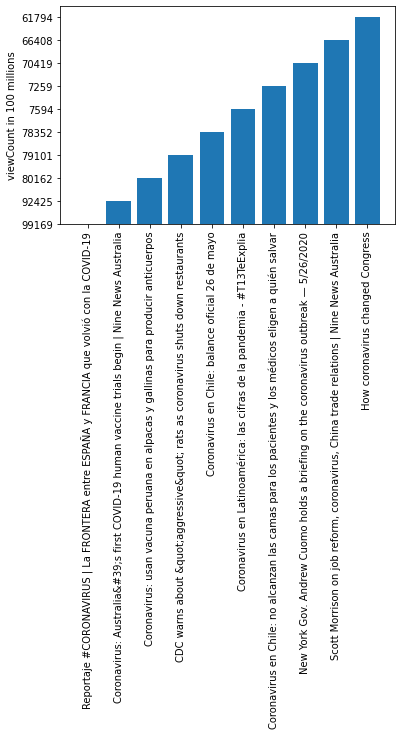

In [0]:
df1 = df1.sort_values(ascending=False,by='viewCount').head(10)
plt.bar(range(df1.shape[0]),df1['viewCount'])
plt.xticks(range(df1.shape[0]),df1['Title'],rotation=90)
plt.ylabel('viewCount in 100 millions')

plt.show()

In [0]:
#input list of search terms of interest 
keywords = ["bts","blackpink","twice","one direction"]
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

max_results=50
order="relevance"
token=None
location=None
location_radius=None

title = []
channelId = []
channelTitle = []
categoryId = []
videoId = []
pubDate = [] 
viewCount = []
likeCount = []
dislikeCount = []
commentCount = []
favoriteCount = []
category = []
tags = []
videos = []
keyword = []

for q in keywords:
    search_response = youtube.search().list(
    q=q,
    type="video",
    pageToken=token,
    order = order,
    part="id,snippet",  
    maxResults=max_results,
    location=location,
    locationRadius=location_radius).execute()


    for search_result in search_response.get("items", []):

        keyword.append(q)

        if search_result["id"]["kind"] == "youtube#video":

            title.append(search_result['snippet']['title']) 

            videoId.append(search_result['id']['videoId'])

            response = youtube.videos().list(
                part='statistics, snippet',
                id=search_result['id']['videoId']).execute()

            channelId.append(response['items'][0]['snippet']['channelId'])
            channelTitle.append(response['items'][0]['snippet']['channelTitle'])
            pubDate.append(response['items'][0]['snippet']['publishedAt'])
            categoryId.append(response['items'][0]['snippet']['categoryId'])
            favoriteCount.append(response['items'][0]['statistics']['favoriteCount'])
            viewCount.append(response['items'][0]['statistics']['viewCount'])
            try:
                likeCount.append(response['items'][0]['statistics']['likeCount'])
            except:
                likeCount.append("NaN")

            try:
                dislikeCount.append(response['items'][0]['statistics']['dislikeCount'])     
            except:
                dislikeCount.append("NaN")

            if 'commentCount' in response['items'][0]['statistics'].keys():
                commentCount.append(response['items'][0]['statistics']['commentCount'])
            else:
                commentCount.append(0)

            if 'tags' in response['items'][0]['snippet'].keys():
                tags.append(response['items'][0]['snippet']['tags'])
            else:
                tags.append("No Tags") 